### Task1 :  Vector Basics Objective: Understand basic operations on vectors.

In [1]:
import numpy as np

In [2]:
#without numpy
 
#vector1 = [1,2,3]
#vector2 = [4,5,6]

In [3]:
vector1 = np.array([1,2,3])
vector2 = np.array([4,5,6])

In [4]:
#Dot result 
dot_result = np.dot(vector1,vector2)
print("Dot Product Result :",dot_result)

Dot Product Result : 32


In [5]:
#Addition 
add_result = vector1 + vector2 
print("Addition Result :",add_result)

Addition Result : [5 7 9]


In [6]:
#Subtraction 
sub_result = np.abs(vector1 - vector2)
print("Subtraction Result :",sub_result)

Subtraction Result : [3 3 3]


In [7]:
#Magnitude (length) of each vector

mag_vector1 = np.linalg.norm(vector1)
mag_vector2 = np.linalg.norm(vector2)
print("Magnitude of v1:", mag_vector1)
print("Magnitude of v2:", mag_vector2)

Magnitude of v1: 3.7416573867739413
Magnitude of v2: 8.774964387392123


### Task 2: Matrix Operations
Objective: Perform matrix multiplication and understand shapes.

In [12]:
def input_matrix(rows,cols,name):
    print(f"Enter {rows}x{cols} matrix {name}, row by row,space-seperated:")
    matrix = []
    for i in range(rows):
        while True :
            try:
                row = list(map(float,input(f"Row {i+1}: ").strip().split()))
                if len(row) != cols:
                    print(f"Please enter exactly {cols} numbers seperated by spaces.")
                    continue 
                matrix.append(row)
                break
            except ValueError:
                print("Invalid input. Please enter numbers only.")
    return np.array(matrix)

A_rows , A_cols = 2 ,3 
B_rows , B_cols = 3 ,2 

A = input_matrix(A_rows,A_cols,"A")
B = input_matrix(B_rows,B_cols,"B")

print("\nMatrix A:")
print(A)
print("\nMatrix B:")
print(B)


Enter 2x3 matrix A, row by row,space-seperated:


Enter 3x2 matrix B, row by row,space-seperated:

Matrix A:
[[1. 2. 3.]
 [4. 5. 6.]]

Matrix B:
[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [20]:
#Perform matrix multiplication: C = A * B.
#1 ->-> C = A @ B 
#or 
C = np.dot(A,B)
print(f"Product is :{C}")

Product is :[[22. 28.]
 [49. 64.]]


In [21]:
print("Shape of C:",C.shape)

Shape of C: (2, 2)


In [23]:
#Try to multiply in the reverse order and explain the error (if any).

#1 -> C_Inverse = np.dot(B,A)
C_Inverse = B @ A 
print(C_Inverse)

[[ 9. 12. 15.]
 [19. 26. 33.]
 [29. 40. 51.]]


In [24]:
#the error may we face that if the number cols for the first matrix not equal to the number of rows for the second matrix the multiplication is false.

###  Task 3: Linear Transformation Visual
Objective: Apply and visualize transformations on a set of 2D points.

In [33]:
#Define the range for x and y axes 
x_values = np.linspace(0,5,5) 
y_values = np.linspace(0,5,5)

#Create a grid of points(X,Y)
X,Y = np.meshgrid(x_values,y_values)
#Display Results 
print("X-grid:")
print(X)

print("\nY-grid:")
print(Y)

print("\nCombined grid points:")
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        print(f"{X[i,j]}, {Y[i,j]}",end = ' ')
    print()

X-grid:
[[0.   1.25 2.5  3.75 5.  ]
 [0.   1.25 2.5  3.75 5.  ]
 [0.   1.25 2.5  3.75 5.  ]
 [0.   1.25 2.5  3.75 5.  ]
 [0.   1.25 2.5  3.75 5.  ]]

Y-grid:
[[0.   0.   0.   0.   0.  ]
 [1.25 1.25 1.25 1.25 1.25]
 [2.5  2.5  2.5  2.5  2.5 ]
 [3.75 3.75 3.75 3.75 3.75]
 [5.   5.   5.   5.   5.  ]]

Combined grid points:
0.0, 0.0 1.25, 0.0 2.5, 0.0 3.75, 0.0 5.0, 0.0 
0.0, 1.25 1.25, 1.25 2.5, 1.25 3.75, 1.25 5.0, 1.25 
0.0, 2.5 1.25, 2.5 2.5, 2.5 3.75, 2.5 5.0, 2.5 
0.0, 3.75 1.25, 3.75 2.5, 3.75 3.75, 3.75 5.0, 3.75 
0.0, 5.0 1.25, 5.0 2.5, 5.0 3.75, 5.0 5.0, 5.0 


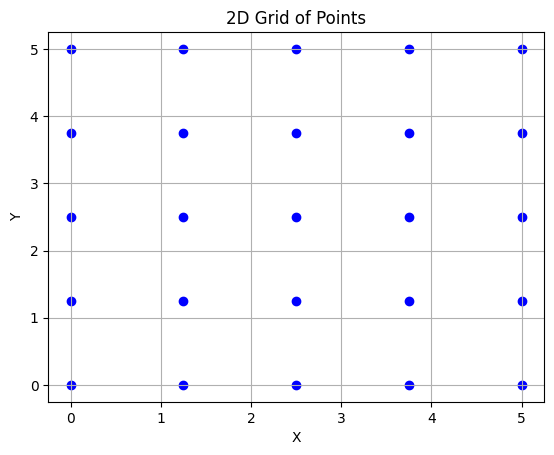

In [34]:
import matplotlib.pyplot as plt

plt.scatter(X, Y, color='blue')
plt.title("2D Grid of Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [35]:
import math 

In [46]:
#Rotation -> Rotate around origin
def rotation_matrix(theta_deg):
    theta = math.radians(theta_deg)
    cos_t = np.cos(theta)
    sin_t = np.sin(theta)

    return np.array([
        [cos_t , -sin_t,0],
        [sin_t , cos_t,0],
        [0  ,  0 ,   1]
    ])

In [42]:
#Scaling -> Resize object 
def scaling_matrix(sx,sy):
    return np.array([
        [sx,0,0],
        [0,sy,0],
        [0,0,1]
    ])

In [43]:
#Translation -> Move Object
def translation_matrix(tx,ty):
    return np.array([
        [1,0,tx],
        [0,1,ty],
        [0,0,1]
    ])

In [44]:
#Shearing -> skew shape
def shear_matrix(shx,shy):
    return np.array([
        [1,shx,0],
        [shy,1,0],
        [0,0,1]
    ])

In [47]:
#Original point (x,y)
point = np.array([1,0,1]) # (x=1,y=0) , w=1

#Define transformations 
T = translation_matrix(2,3) #Translate by (2,3)
R = rotation_matrix(45) #Rotate 45 degrees 
S = scaling_matrix(2,2) #Scale by factor of 2 

print(T)
print(R)
print(S)

[[1 0 2]
 [0 1 3]
 [0 0 1]]
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
[[2 0 0]
 [0 2 0]
 [0 0 1]]


In [48]:
#Combine transformations : first scale , then rotate , then translate 

combined = T @ R @ S 
#Apply transformation 
transformed_point = combined @ point 

print("Transformed point:",transformed_point)

Transformed point: [3.41421356 4.41421356 1.        ]


In [49]:
#Apply to Grid points 

x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)

X,Y = np.meshgrid(x,y)

points = np.vstack([X.ravel(),Y.ravel(),np.ones_like(X.ravel())])

In [51]:
transformed_points = combined @ points 
tx = transformed_points[0, :].reshape(X.shape)
ty = transformed_points[1, :].reshape(Y.shape)

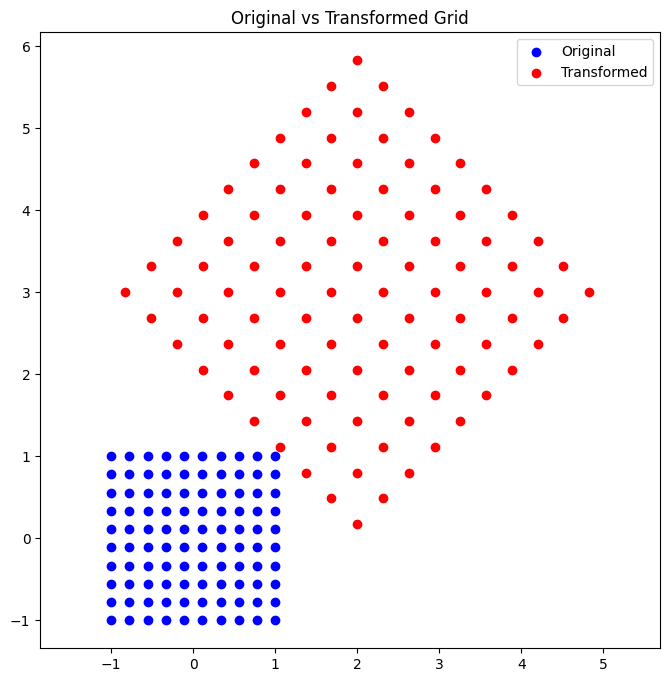

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(X, Y, c='blue', label='Original')
plt.scatter(tx, ty, c='red', label='Transformed')
plt.legend()
plt.axis('equal')
plt.title("Original vs Transformed Grid")
plt.show()

In [53]:
# Split transformed points into x and y components
tx_translated = (T @ points)[0, :].reshape(X.shape)
ty_translated = (T @ points)[1, :].reshape(Y.shape)

tx_rotated = (R @ T @ points)[0, :].reshape(X.shape)
ty_rotated = (R @ T @ points)[1, :].reshape(Y.shape)

tx_scaled = (S @ R @ T @ points)[0, :].reshape(X.shape)
ty_scaled = (S @ R @ T @ points)[1, :].reshape(Y.shape)


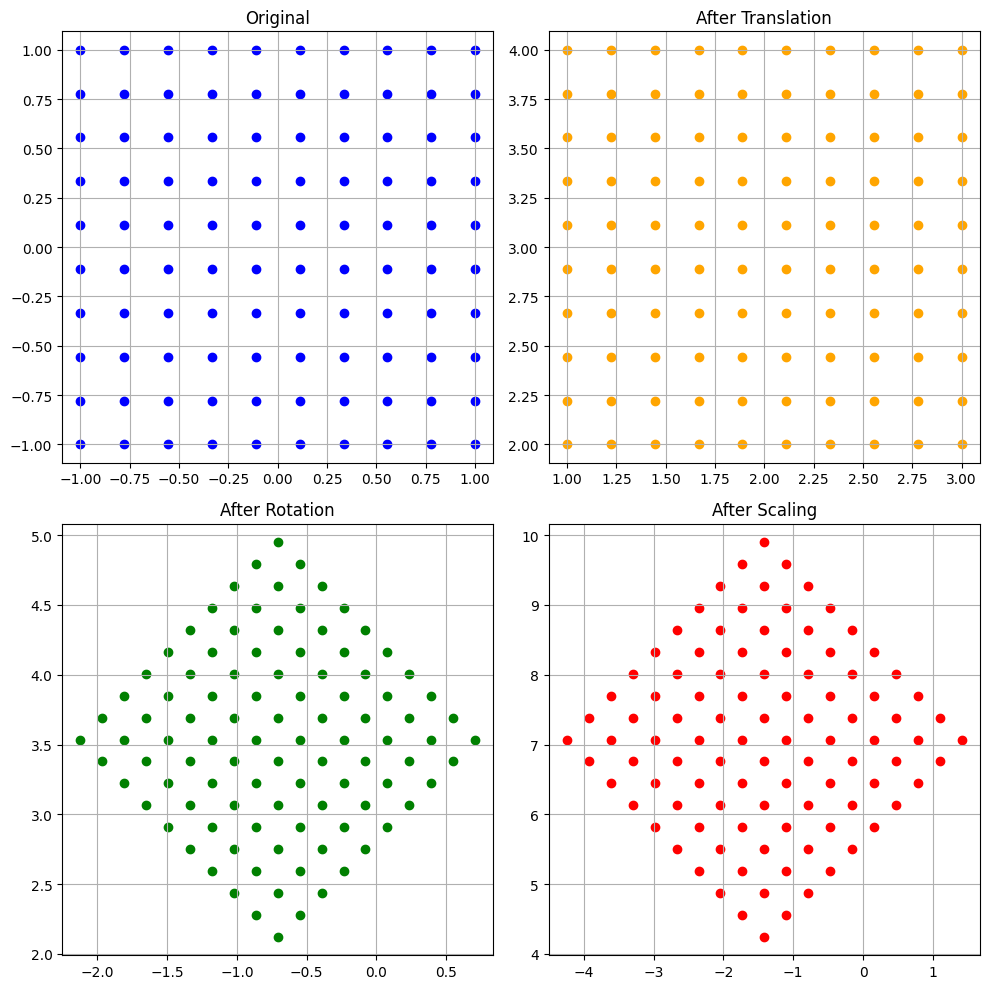

In [56]:
# -------------------------------
# Plotting
# -------------------------------

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Original
axs[0, 0].scatter(X, Y, c='blue')
axs[0, 0].set_title("Original")
axs[0, 0].axis('equal')
axs[0, 0].grid(True)

# After Translation
axs[0, 1].scatter(tx_translated, ty_translated, c='orange')
axs[0, 1].set_title("After Translation")
axs[0, 1].axis('equal')
axs[0, 1].grid(True)

# After Rotation
axs[1, 0].scatter(tx_rotated, ty_rotated, c='green')
axs[1, 0].set_title("After Rotation")
axs[1, 0].axis('equal')
axs[1, 0].grid(True)

# After Scaling
axs[1, 1].scatter(tx_scaled, ty_scaled, c='red')
axs[1, 1].set_title("After Scaling")
axs[1, 1].axis('equal')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

### Calculus – Tasks with Python
🧩 Task 1: Derivative of a Function
Objective: Compute derivatives symbolically.

In [57]:
#Define a function: f(x) = x^2 + 3x + 2. 

f = x**2 + 3*x + 2 

In [58]:
%pip install sympy


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: C:\Users\Anwar Altorkmani\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [61]:
import sympy as sp

x = sp.symbols('x')

f = x**2 + 3*x + 2 

f_prime = sp.diff(f,x)

print("f(x) =",f)
print("f'(x) =",f_prime)

f(x) = x**2 + 3*x + 2
f'(x) = 2*x + 3


In [62]:
# Evaluate derivative at x = 1
print("f'(1) =", f_prime.subs(x, 1))
print("f'(2) =", f_prime.subs(x, 2))
print("f'(3) =", f_prime.subs(x, 3))

f'(1) = 5
f'(2) = 7
f'(3) = 9


🧩 Task 2: Plot Function & Slope
Objective: Plot a function and tangent lines at specific points.

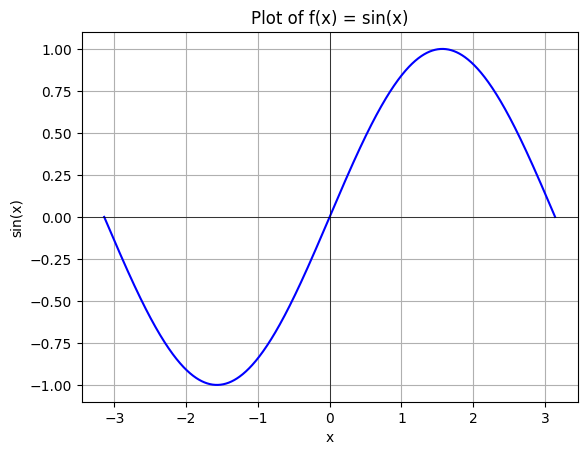

In [63]:
# Define the range of x values from -pi to pi 
x = np.linspace(-np.pi,np.pi,1000)

#Compute the corresponding y values (sin(x))
y = np.sin(x)

#Plot the function 
plt.plot(x,y,label="f(x) = sin(x)",color="blue")

#Add labels and title 
plt.title("Plot of f(x) = sin(x)")
plt.xlabel("x")
plt.ylabel("sin(x)")

#Add grid and legend 
plt.grid(True)
plt.axhline(0,color='black',linewidth=0.5)
plt.axvline(0,color='black',linewidth=0.5)

plt.show()

In [65]:
def f(x):
    return np.sin(x)

def df(x):
    return np.cos(x)

In [66]:
#point where we want the tangent line 
x0 = np.pi / 4

#Evaluate function and derivative at x0 
y0 = f(x0)
m = df(x0) #slope of the tangent

#Generate x values for plotting
x_vals = np.linspace(-np.pi,np.pi,1000)
y_vals = f(x_vals)

#Tangent line : y = m*(x - x0) + y0 
tangent_y = m * (x_vals - x0) + y0


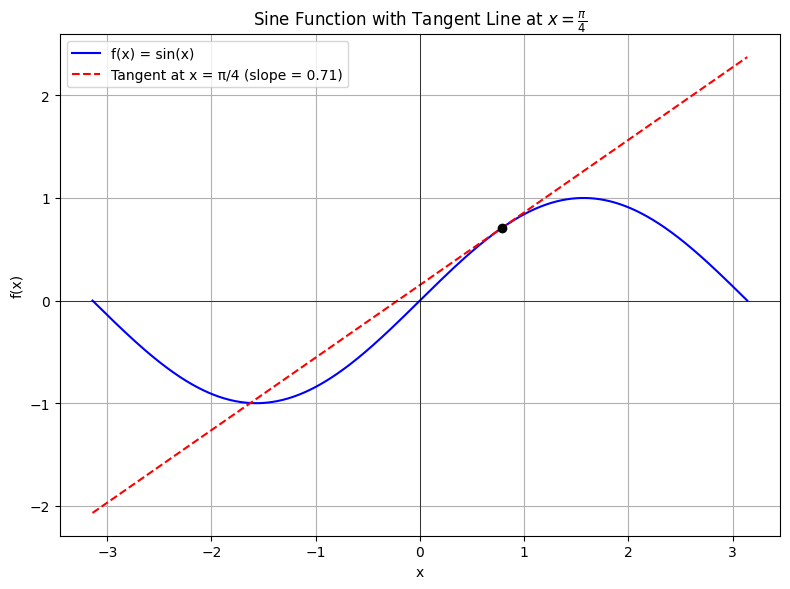

In [67]:
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="f(x) = sin(x)", color="blue")
plt.plot(x_vals, tangent_y, '--', label=f"Tangent at x = π/4 (slope = {m:.2f})", color="red")

# Mark the point of tangency
plt.scatter(x0, y0, color='black', zorder=5)

# Add labels and legend
plt.title("Sine Function with Tangent Line at $ x = \\frac{\\pi}{4} $")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

🧩 Task 3: Gradient Descent Demo
Objective: Implement a simple gradient descent algorithm.

In [68]:
def cost_function(w):
    return (w - 5) ** 2 

def gradient(w):
    return 2 * (w - 5)

In [69]:
#Hyperparameters 

learning_rate = 0.1
num_iterations = 100
w_initial = 0.0 #Starting point 

#Gradient Descent Algorithm 
w = w_initial 
history = [] # to store how w changes over time 

for i in range(num_iterations):
    grad = gradient(w)
    w = w - learning_rate * grad
    history.append(w)
print("Final value of w:",w) 

Final value of w: 4.999999998981481


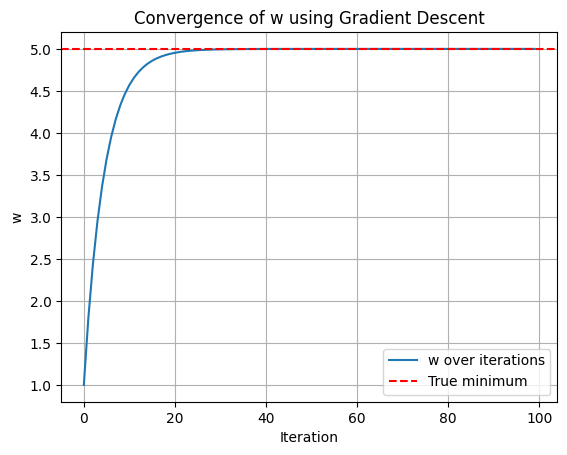

In [70]:
plt.plot(history, label='w over iterations')
plt.axhline(y=5, color='r', linestyle='--', label='True minimum')
plt.xlabel('Iteration')
plt.ylabel('w')
plt.title('Convergence of w using Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

Probability & Statistics – Tasks with Python
🧩 Task 1: Simulate Coin Toss
Objective: Simulate random events and visualize outcomes.


In [74]:
#Simulate 1000 coin tosses
tosses = np.random.choice([0,1],size=1000)

print("First 10 tosses:",tosses[:10])


First 10 tosses: [0 1 1 0 0 0 0 1 0 0]


In [72]:
#Count heads and tails

num_heads = np.sum(tosses)
num_tails = len(tosses) - num_heads

print("Number of heads:", num_heads)
print("Number of tails:", num_tails)

Number of heads: 496
Number of tails: 504


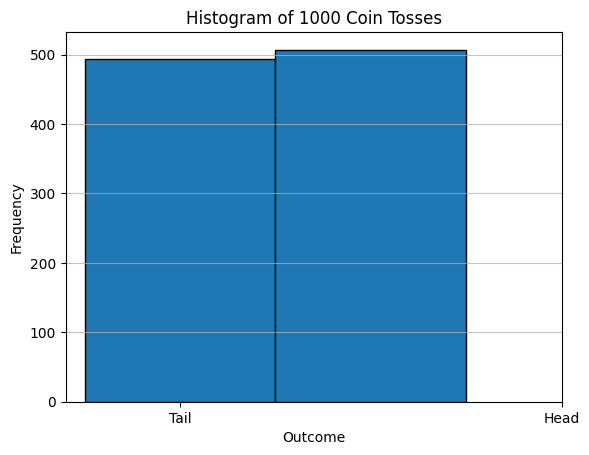

In [75]:
#Plot histogram of outcomes

plt.hist(tosses, bins=2, edgecolor='black', align='left')
plt.xticks([0, 1], ['Tail', 'Head'])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of 1000 Coin Tosses')
plt.grid(axis='y', alpha=0.75)
plt.show()

🧩 Task 2: Descriptive Stats
Objective: Calculate basic statistics for a dataset.

In [76]:
# Cell 1: Generate random exam scores (integers between 0 and 100)

np.random.seed(42)
scores = np.random.randint(0,101,size=100)
print("First 10 scores:",scores[:10])

First 10 scores: [51 92 14 71 60 20 82 86 74 74]


In [82]:
#Compute descriptive statistics

from scipy import stats

mean_score = np.mean(scores)
median_score = np.median(scores)

# Make sure to extract the mode as a scalar using [0] or item()
mode_result = stats.mode(scores)
mode_score = mode_result.mode[0] if isinstance(mode_result.mode, np.ndarray) else mode_result.mode

variance_score = np.var(scores)
std_dev_score = np.std(scores)

print("Mean:        ", mean_score)
print("Median:      ", median_score)
print("Mode:        ", mode_score)
print("Variance:    ", variance_score)
print("Std Dev:     ", std_dev_score)

Mean:         51.31
Median:       53.5
Mode:         61
Variance:     873.5139000000001
Std Dev:      29.555268565858103


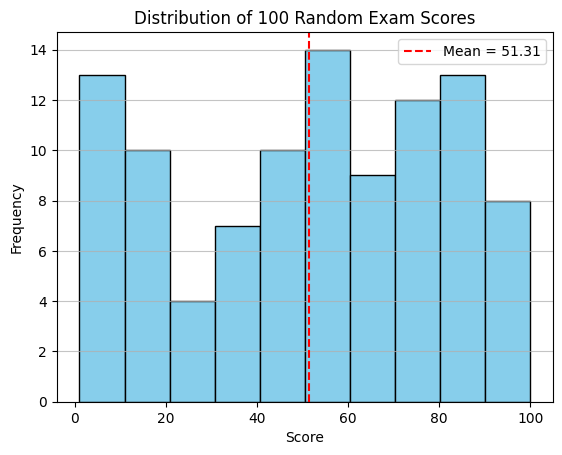

In [83]:
# Cell 3: Plot histogram of the scores

plt.hist(scores, bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution of 100 Random Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean = {mean_score:.2f}')
plt.legend()
plt.show()

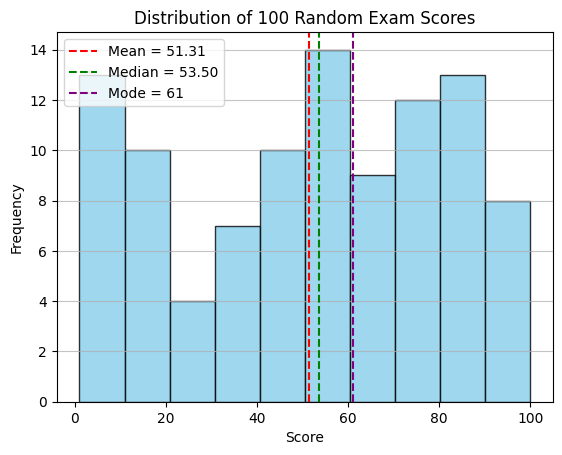

In [84]:
#Plot histogram with mean, median, and mode lines

plt.hist(scores, bins=10, edgecolor='black', color='skyblue', alpha=0.8)
plt.title('Distribution of 100 Random Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Add vertical lines for mean, median, mode
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean = {mean_score:.2f}')
plt.axvline(median_score, color='green', linestyle='dashed', linewidth=1.5, label=f'Median = {median_score:.2f}')
plt.axvline(mode_score, color='purple', linestyle='dashed', linewidth=1.5, label=f'Mode = {mode_score}')

plt.legend()
plt.show()

🧩 Task 3: Bayes’ Theorem Simulation
Objective: Apply conditional probability using Bayes’ Theorem.

In [86]:
#Compute P(D|+) using Bayes' Theorem

# Given probabilities
p_disease = 0.01          # P(D)
p_no_disease = 1 - p_disease  # P(¬D)

p_positive_given_disease = 0.99    # P(+|D)
p_positive_given_no_disease = 0.01 # P(+|¬D)

# Total probability of testing positive
p_positive = (p_positive_given_disease * p_disease +
              p_positive_given_no_disease * p_no_disease)

# Bayes' Theorem
p_disease_given_positive = (p_positive_given_disease * p_disease) / p_positive

# Display result
print(f"P(Disease | Positive Test) = {p_disease_given_positive:.4f}")

P(Disease | Positive Test) = 0.5000


In [ ]:
#Result Explanation:
#Even with a very accurate test (99%) , because the disease is rare (1%) , most positive tests are false positives .
#So, if someone tests positive, there's only about a 50% chance they actually have the disease.

#Even with a 99% accurate test, due to the low prevalence (1%), the probability that someone actually has the disease after testing positive is around 50% . 